# Csv DataFrame

In [18]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [ ]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="x"
)

In [5]:
iris_df = pd.read_csv("../data/iris.csv")
iris_df

,sepal.id,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Virginica
146,146,6.3,2.5,5.0,1.9,Virginica
147,147,6.5,3.0,5.2,2.0,Virginica
148,148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.id      150 non-null    int64  
 1   sepal.length  150 non-null    float64
 2   sepal.width   150 non-null    float64
 3   petal.length  150 non-null    float64
 4   petal.width   150 non-null    float64
 5   variety       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Profesores

In [6]:
profes_df = pd.read_csv("../data/profesores.csv")
profes_df

,nombre,correo,password,nivel,instituto,grado,carrera,tipo
0,Alicia Santiago Santos,alicia@mixteco.utm.mx,alis,4,4,Dra.,7.0,0
1,Armando Alcalá Vallejo,avallejo@mixteco.utm.mx,gdfgdf,4,4,M.M.M.,7.0,0
2,Franco Barragán Mendoza,franco@mixteco.utm.mx,matemendoza,3,4,Dr.,7.0,0
3,Luz Del Carmen Álvarez Marín,lalvarez@mixteco.utm.mx,hgf,4,4,Dra.,7.0,0
4,Cuauhtémoc Héctor Castañeda Roldán,ccroldan@mixteco.utm.mx,bvb,4,4,Dr.,7.0,0
...,...,...,...,...,...,...,...,...
240,Eliezer Luna Rivera,Eliezer@mixteco.utm.mx,x,4,3,Arq.,32.0,5
241,María de Jesús Martínez López,mmartinez@mixteco.utm.mx,x,4,4,Dra.,17.0,6
242,Enrique Reyes Arzola,enriquereyesarzola@mixteco.utm.mx,x,4,13,Mtro.,11.0,6
243,Claudia Janette Urbano López,claudiaurbano@mixteco.utm.mx,x,4,5,Mtra.,5.0,5


## Institutos

In [7]:
institutos_df = pd.read_csv("../data/institutos.csv")
institutos_df

,codigo,nombre
0,2,Instituto de computación
1,1,Instituto de electrónica y mecatrónica
2,3,Instituto de diseño
3,4,Instituto de física y matemáticas
4,5,Instituto de ciencias sociales y humanidades
5,8,Instituto de agroindustrias
6,0,vice-rectoria académica
7,100,Posgrado
8,9,Instituto de hidrología
9,10,Instituto de minería


## Carreras

In [9]:
carreras_df = pd.read_csv("../data/institutos.csv")
carreras_df

,codigo,nombre
0,2,Instituto de computación
1,1,Instituto de electrónica y mecatrónica
2,3,Instituto de diseño
3,4,Instituto de física y matemáticas
4,5,Instituto de ciencias sociales y humanidades
5,8,Instituto de agroindustrias
6,0,vice-rectoria académica
7,100,Posgrado
8,9,Instituto de hidrología
9,10,Instituto de minería


In [12]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="x",
    database="ciencia_de_datos"
)

In [13]:
mycursor = mydb.cursor()

## Numero de profesores por carrera

In [14]:
sql = "SELECT C.nombre, C.sigla, COUNT(C.codigo) as cantidad FROM profesor P INNER JOIN carreras C ON P.idCarrera=C.codigo GROUP BY (C.id);"
consulta = pd.read_sql(sql,mydb)

/tmp/ipykernel_12351/1927662876.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  consulta = pd.read_sql(sql,mydb)


In [15]:
consulta

,nombre,sigla,cantidad
0,Ingeniería en Electrónica,IE,1
1,Ingeniería en Computación,IC,1
2,Ingeniería en Mecatronica,IM,1


In [16]:
profesbycarreras_df = pd.read_csv("../data/profesoresBycarreras.csv")
profesbycarreras_df

,nombre,siglas,cantidad
0,Estudios de Nuevos Materiales,ENM,1
1,Ingeniería en Computación,IC,28
2,Ingeniería en Diseño,ID,18
3,Ingeniería en Electrónica,IE,16
4,Licenciatura en Ciencias Empresariales,LCE,43
5,Ingeniería en Alimentos,IA,14
6,Licenciatura en Matemáticas Aplicadas,LMA,36
7,Ingeniería Industrial,II,10
8,Ingeniería en Mecatrónica,IM,15
9,Ingeniería en Física Aplicada,IFA,18


### Gráfica

Text(0.5, 1.0, 'Gráfica de número de Profesores por carrera')

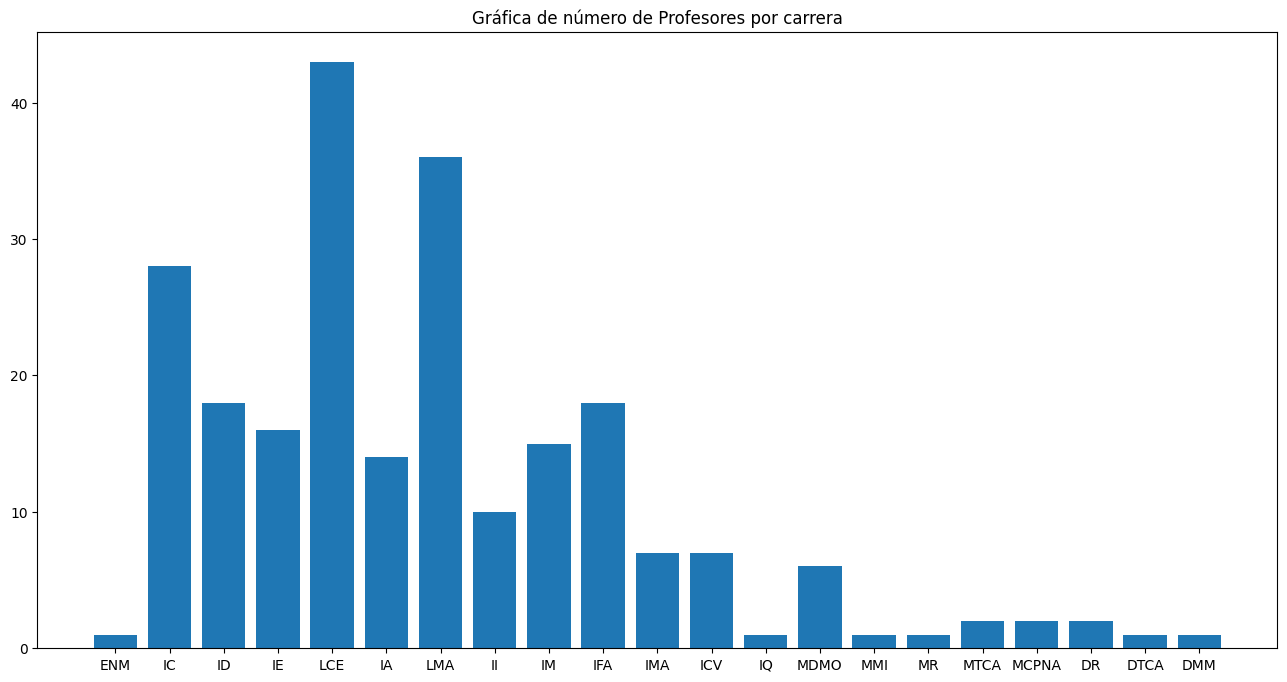

In [19]:
plt.figure(figsize=(16,8))
plt.bar(profesbycarreras_df['siglas'],profesbycarreras_df['cantidad'])
plt.title("UTM")
plt.title("Gráfica de número de Profesores por carrera")

## Número de profesores por instituto